# Plotting active learning

Imports

### Plot results.

In [160]:
import pandas as pd
import os
rep = 'GraphConv'
home_dir = './results/comparison_results/'
home_dir_list = os.listdir(home_dir)

folders = [h for h in home_dir_list if 'gp' in h]
paths = [f'{home_dir}/{f}/best_{rep}_Adam.csv' for f in folders]
best_df_mle = pd.concat([pd.read_csv(p, index_col=0) for p in paths])
best_df_mle['Number of Candidates Acquired'] = best_df_mle['Step']

folders = [h for h in home_dir_list if 'mle' in h]
paths = [f'{home_dir}/{f}/best_{rep}_Adam.csv' for f in folders]
best_df_gp = pd.concat([pd.read_csv(p, index_col=0) for p in paths])
best_df_gp['Number of Candidates Acquired'] = best_df_gp['Step']

# # fix column titles
# best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'random'] = 'Random'
# best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'expected improvement'] = 'Expected Improvement'
# best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'probability of improvement'] = 'Probability of Improvement'
# best_df_gp['Acquisition Function'].loc[best_df_gp['Acquisition Function'] == 'upper confidence bound'] = 'Upper Confidence Bound'

Bringing them together.

In [140]:
best_df_mle['type'] = 'MLE'
best_df_gp['type'] = 'GP'
best_df = pd.concat([best_df_mle, best_df_gp])

Grid format!

c:\users\micha\miniconda3\envs\pinot\lib\site-packages\seaborn\axisgrid.py:100: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


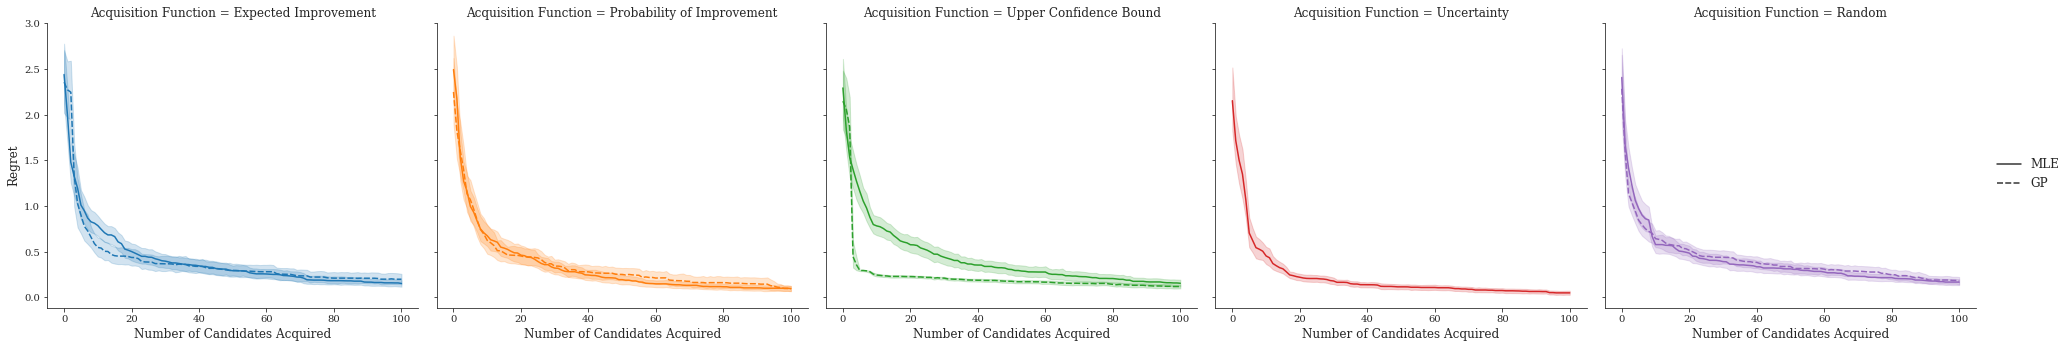

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm as cm
colors = plt.get_cmap('tab10')
plt.rc('font', family='serif', size=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sns.set_palette('tab10')

plot = sns.relplot(x="Number of Candidates Acquired", y="Regret",
                   col="Acquisition Function", hue="Acquisition Function",
                   kind="line",
                   style="type", # comment out if not comparing
                   data=best_df)

# comment out if not comparing
h, l = plot.axes[0][0].get_legend_handles_labels()
plot._legend.remove()
plot.add_legend(handles=h[-2:], labels=l[-2:])